In [1]:
import scipy.io
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm

from sklearn import linear_model
from utils import multiplot
import pandas as pd

In [2]:
mat = scipy.io.loadmat('PowerValuesOctMay.mat')
y = mat['MeasurementsTotal'].reshape(5736,)
y_serie = pd.Series(y)

In [111]:
dayone = datetime.datetime(2014,10,5)
x_date = np.array([])
for i in range(len(y)):
    x_date = np.append(x_date, [dayone+(datetime.timedelta(hours=1)*i)])
def construct_X(length):
    return pd.DataFrame([[
          np.sin(2*np.pi*i/1), 
          np.cos(2*np.pi*i/1),
          np.sin(2*np.pi*i/2), 
          np.cos(2*np.pi*i/2),
          np.sin(2*np.pi*i/4), 
          np.cos(2*np.pi*i/4),
          np.sin(2*np.pi*i/12), 
          np.cos(2*np.pi*i/12),
          np.sin(2*np.pi*i/24), 
          np.cos(2*np.pi*i/24),
          np.sin(2*np.pi*i/(5*24)), 
          np.cos(2*np.pi*i/(5*24)),
          np.sin(2*np.pi*i/(7*24)), 
          np.cos(2*np.pi*i/(7*24)),
          np.sin(2*np.pi*i/(30*24)), 
          np.cos(2*np.pi*i/(30*24))
        ] for i in range(length)], columns=['sin(2pi*t/1)', 'col(2pi*t/1)',
                                        ' sin(2pi*t/2)', 'col(2pi*t/2)',
                                         'sin(2pi*t/4)', 'col(2pi*t/4)',
                                           
                                         'sin(2pi*t/12)', 'col(2pi*t/12)',
                                             'sin(2pi*t/5*24)', 'col(2pi*t/5*24)',
                                         'sin(2pi*t/24)',' col(2pi*t/24)',' sin(2pi*t/7*24)', 'col(2pi*t/1)', 
                                        'sin(2pi*t/30*24)', 'col(2pi*t/30*24)'])
x = construct_X(len(y))
x.head()

,sin(2pi*t/1),col(2pi*t/1),sin(2pi*t/2),col(2pi*t/2),sin(2pi*t/4),col(2pi*t/4),sin(2pi*t/12),col(2pi*t/12),sin(2pi*t/5*24),col(2pi*t/5*24),sin(2pi*t/24),col(2pi*t/24),sin(2pi*t/7*24),col(2pi*t/1),sin(2pi*t/30*24),col(2pi*t/30*24)
0,0.000000e+00,1.0,0.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
1,-2.449294e-16,1.0,1.224647e-16,-1.0,1.000000e+00,6.123234e-17,0.500000,8.660254e-01,0.258819,0.965926,0.052336,0.998630,0.037391,0.999301,0.008727,0.999962
2,-4.898587e-16,1.0,-2.449294e-16,1.0,1.224647e-16,-1.000000e+00,0.866025,5.000000e-01,0.500000,0.866025,0.104528,0.994522,0.074730,0.997204,0.017452,0.999848
3,-7.347881e-16,1.0,3.673940e-16,-1.0,-1.000000e+00,-1.836970e-16,1.000000,6.123234e-17,0.707107,0.707107,0.156434,0.987688,0.111964,0.993712,0.026177,0.999657
4,-9.797174e-16,1.0,-4.898587e-16,1.0,-2.449294e-16,1.000000e+00,0.866025,-5.000000e-01,0.866025,0.500000,0.207912,0.978148,0.149042,0.988831,0.034899,0.999391


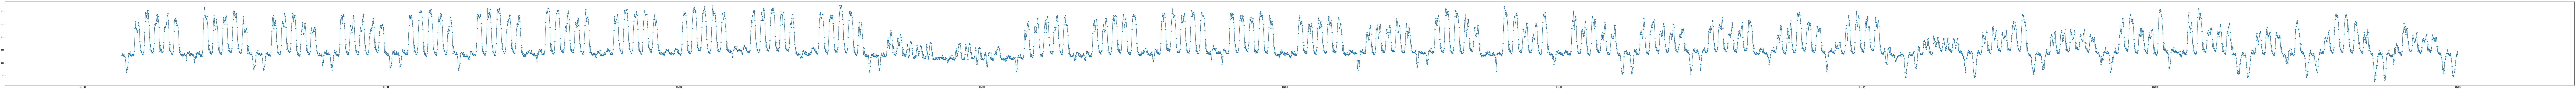

In [15]:
plt.figure(figsize=(300,10))
plt.plot(x_date,y, 'o-')
# ticks = [int(i)-1 for i in np.linspace(1, len(y), 10)]
# plt.xticks(x_date[ticks])
plt.savefig("orig")
plt.show();

In [5]:
regr = linear_model.LinearRegression()

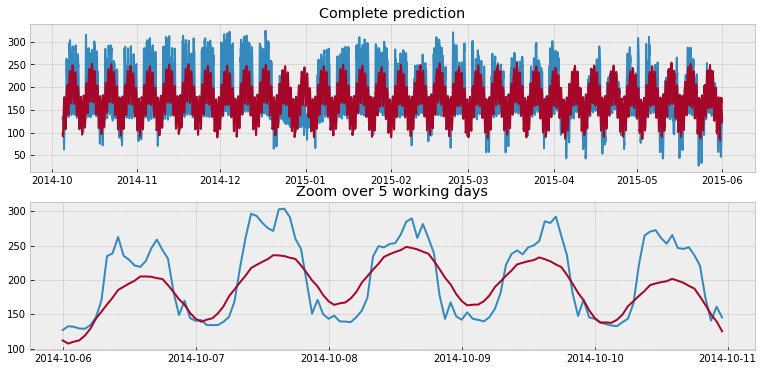

In [6]:
regr.fit(x, y)
y_pred = regr.predict(x)

with plt.style.context('bmh'): 
    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(13,6))
    ax1.plot(x_date, y, label="data")
    ax1.plot(x_date, y_pred, label='prediction')
    ax1.set_title('Complete prediction')
    ax2.plot(x_date[24:6*24],y[24:6*24], label='data')
    ax2.plot(x_date[24:6*24],y_pred[24:6*24], label='prediction')
    ax2.set_title('Zoom over 5 working days')
#     ax3.plot(x_date[24:6*24], y_p)
plt.savefig("fitted")

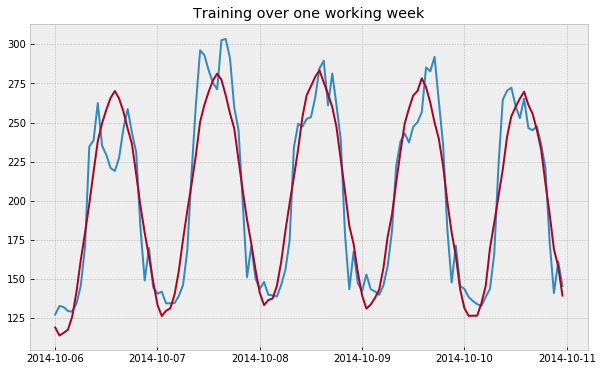

In [7]:
regr.fit(x[24:6*24], y[24:6*24])
y_pred = regr.predict(x)

with plt.style.context('bmh'): 
    fig = plt.figure(figsize=(10,6))
    plt.plot(x_date[24:6*24], y[24:6*24], label="data")
    plt.plot(x_date[24:6*24], y_pred[24:6*24], label='prediction')
    plt.title('Training over one working week')
#     ax3.plot(x_date[24:6*24], y_p)
plt.savefig("pred_one_week")

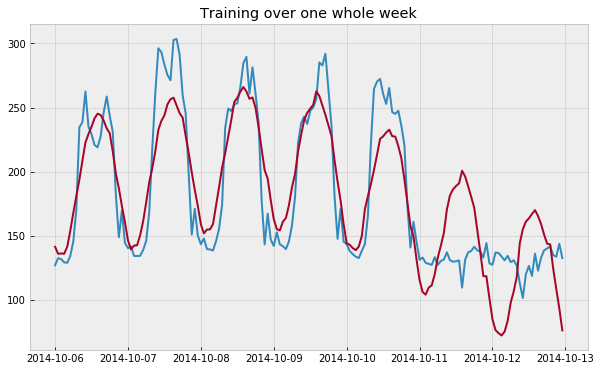

In [8]:
regr.fit(x[24:8*24], y[24:8*24])
y_pred = regr.predict(x)

with plt.style.context('bmh'): 
    fig = plt.figure(figsize=(10,6))
    plt.plot(x_date[24:8*24], y[24:8*24], label="data")
    plt.plot(x_date[24:8*24], y_pred[24:8*24], label='prediction')
    plt.title('Training over one whole week')
#     ax3.plot(x_date[24:6*24], y_p)
plt.savefig("pred_one_week")

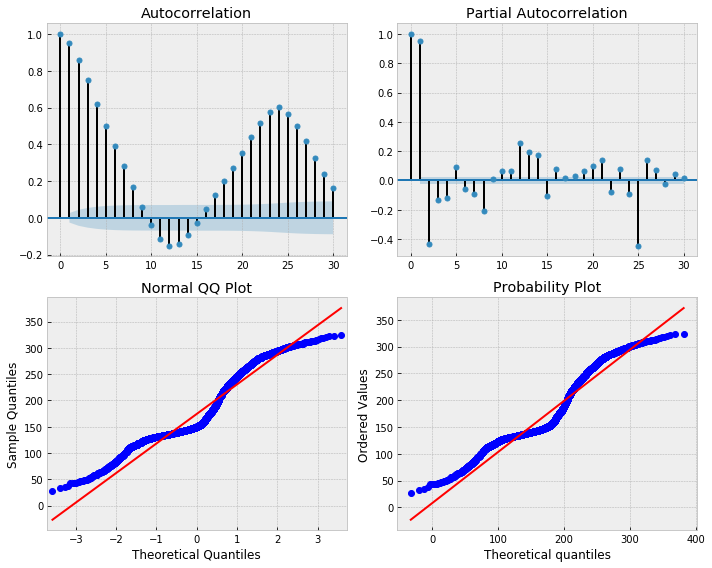

In [9]:
multiplot(y_serie, lags=30, figsize=(10,8))

## ARMA

In [10]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(y_serie.values[:-168], trend='c', order=(1,0,1))
res = mod.fit(disp=False)
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5568
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -23450.747
Date:                Mon, 15 Apr 2019   AIC                          46909.494
Time:                        16:40:14   BIC                          46935.993
Sample:                             0   HQIC                         46918.731
                               - 5568                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.0548      1.201     11.706      0.000      11.702      16.408
ar.L1          0.9196      0.006    151.531      0.000       0.908       0.932
ma.L1          0.3836      0.012     33.071      0.0

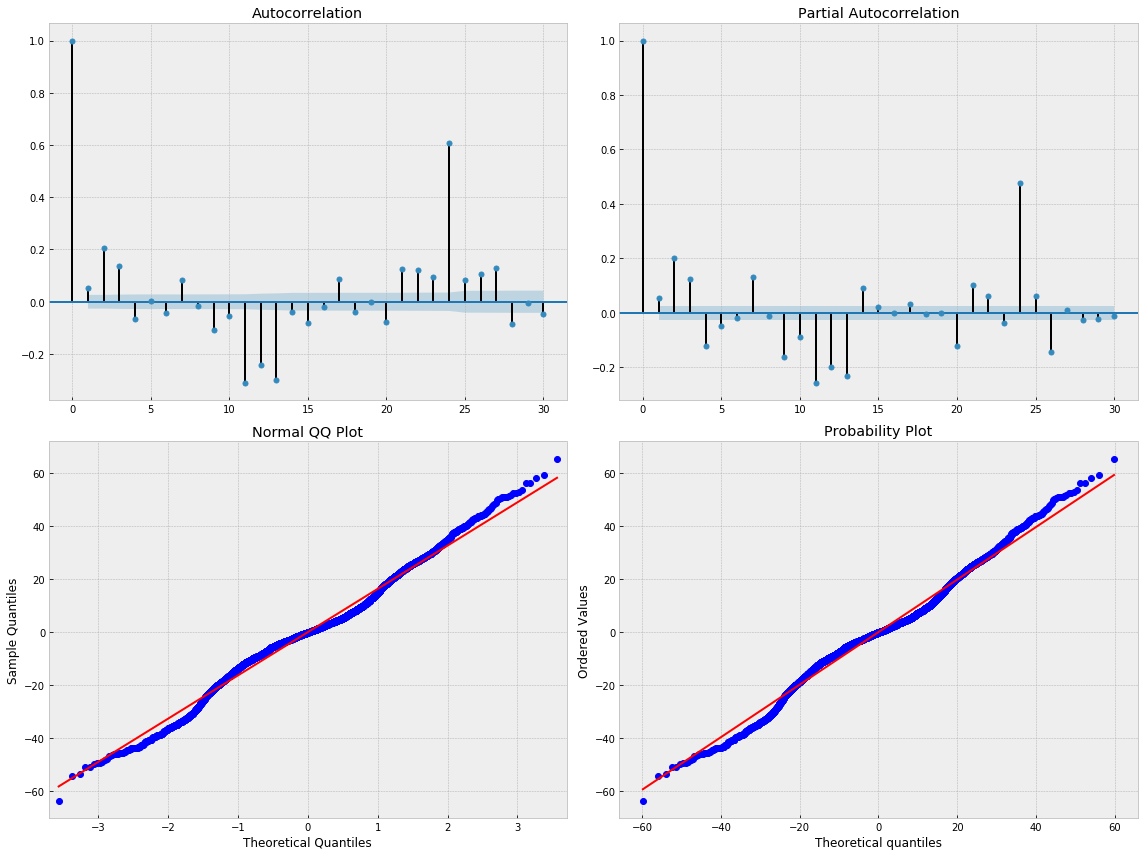

In [11]:
multiplot(res.resid, lags=30)

In [12]:
mod = sm.tsa.statespace.SARIMAX(y_serie.values[:-168], order=(2,0,1), enforce_invertibility=False, seasonal_order=(1,0,1,24))
# import statsmodels
# mod = statsmodels.tsa.arima_model.ARMA(y_serie[:-168], order=(9,9))
res = mod.fit(disp=False)
print(res.summary())
ynewpred = res.predict(start=len(y_serie.values)-168,end=len(y_serie.values))

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 5568
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 24)   Log Likelihood              -21305.777
Date:                            Mon, 15 Apr 2019   AIC                          42623.554
Time:                                    16:40:51   BIC                          42663.303
Sample:                                         0   HQIC                         42637.410
                                           - 5568                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6346      0.019     84.685      0.000       1.597       1.672
ar.L2         -0.6740      0.019   

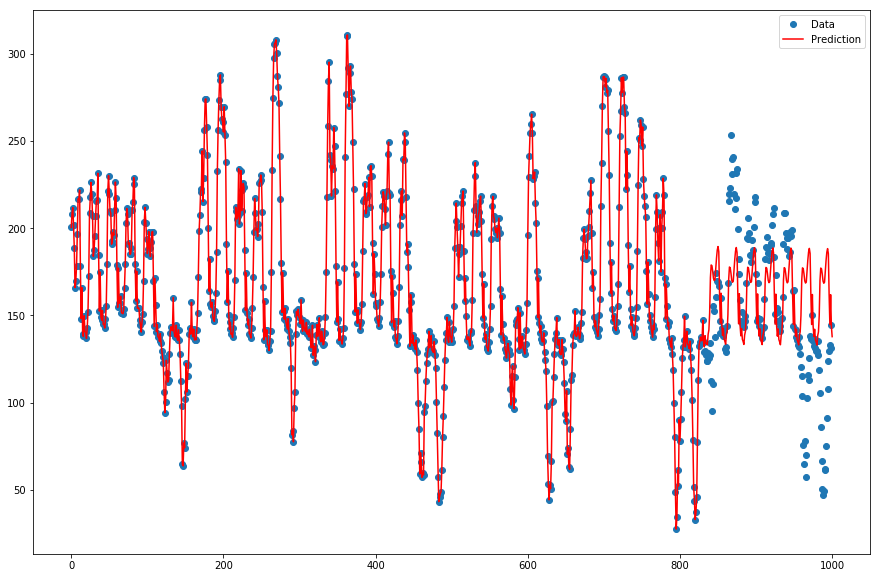

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(y_serie.values[-1000:], 'o', label="Data")
ax.plot(np.hstack((y_serie.values[-1000:-168], ynewpred)), 'r', label="Prediction")
ax.legend(loc="best");

## Separating week and weekends

In [29]:
start = np.datetime64(datetime.date(2014,10,5))
start_winter_holidays = np.datetime64(datetime.date(2014,12,20))
end_winter_holidays = np.datetime64(datetime.date(2015,1,5))
start_easter_holidays = np.datetime64(datetime.date(2015,4,4))
end_easter_holidays = np.datetime64(datetime.date(2015,4,12))
end = np.datetime64(datetime.date(2015,4,30))

In [37]:
df = pd.DataFrame(data={'measure': y, 'date': x_date}, index=np.arange(len(y)))

In [52]:
df_week = df[((df.index//24)%7 > 0) & ((df.index//24)%7 < 6)]
df_weekend = df[((df.index//24)%7 == 1) & ((df.index//24)%7 == 6)]

In [55]:
df_week_no_holidays = df_week[(df_week.date < start_winter_holidays) | 
                             ((df_week.date > end_winter_holidays) & (df_week.date < start_easter_holidays)) | 
                             (df_week.date > end_easter_holidays)]
df_weekend_no_holidays = df_weekend[(df_weekend.date < start_winter_holidays) | 
                             ((df_weekend.date > end_winter_holidays) & (df_weekend.date < start_easter_holidays)) | 
                             (df_weekend.date > end_easter_holidays)]

In [112]:
week_x = construct_X(len(df_week_no_holidays))
regr.fit(week_x[:-100], df_week_no_holidays.measure.values[:-100])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
week_pred = regr.predict(construct_X(5*24 + len(df_week_no_holidays)))

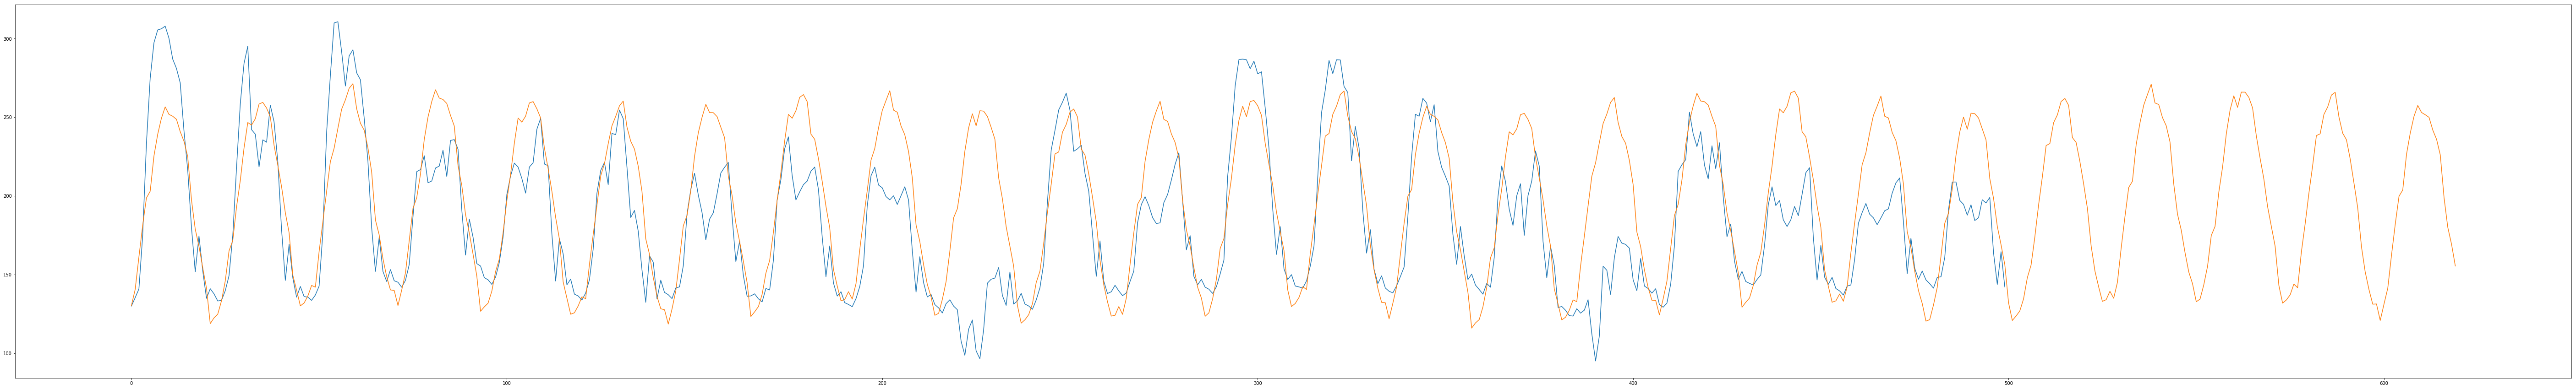

In [115]:
plt.figure(figsize=(100,15))
plt.plot(df_week_no_holidays.measure.values[-500:])
plt.plot(week_pred[-500-5*24:])

In [116]:
target_1_inweek = 4*24 + 11
target_2_inweek = 4*24 + 21
target_3_inweekend = 15

In [118]:
week_pred[len(df_week_no_holidays) + target_1_inweek]

239.95564080774784

In [119]:
week_pred[len(df_week_no_holidays) + target_2_inweek]

179.85129970312119